In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Dataset Selection

wine_data = pd.read_csv("winequality-red.csv")


In [ ]:
# Step 2: Data Exploration
# Let's print the first few rows of the dataset and summary statistics
print(wine_data.head())
print(wine_data.describe())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
# Step 3: Decision Tree Implementation
# Split the dataset into features (X) and target variable (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Step 4: Evaluation
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.565625
Precision: 0.5621393812999653
Recall: 0.565625
F1-score: 0.5635751458932148


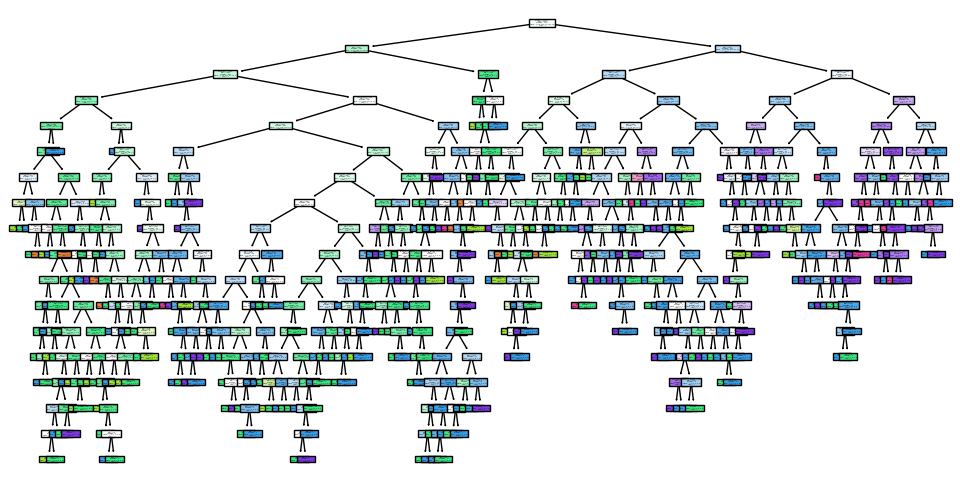

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(12, 6))
tree.plot_tree(clf, feature_names=X.columns, class_names=y.unique().astype(str), filled=True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Step 1: Bootstrap Sampling


# Create 10 bootstrap samples
bootstrap_samples = []
for _ in range(10):
    bootstrap_sample = wine_data.sample(frac=1, replace=True)
    bootstrap_samples.append(bootstrap_sample)

In [ ]:
# Step 2: Model Training
# Train a decision tree on each bootstrap sample
decision_trees = []
for bootstrap_sample in bootstrap_samples:
    X = bootstrap_sample.drop('quality', axis=1)
    y = bootstrap_sample['quality']
    clf = DecisionTreeClassifier()
    clf.fit(X, y)
    decision_trees.append(clf)

In [ ]:
import numpy as np

def bagging_predict(decision_trees, X):
    predictions = np.zeros((len(decision_trees), X.shape[0]))
    for i, tree in enumerate(decision_trees):
        predictions[i] = tree.predict(X)
    # Take majority vote for classification
    aggregated_predictions = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=0, arr=predictions)
    return aggregated_predictions

In [ ]:
# Step 4: Evaluation
# Compare the bagging ensemble's performance against the single decision tree from Part 1

# Separate the original dataset into features (X) and target variable (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
bagging_predictions = bagging_predict(decision_trees, X_test)
bagging_predictions = bagging_predictions.astype(int)  # Convert predictions to integers

bagging_accuracy = accuracy_score(y_test, bagging_predictions)
bagging_precision = precision_score(y_test, bagging_predictions, average='weighted')
bagging_recall = recall_score(y_test, bagging_predictions, average='weighted')
bagging_f1 = f1_score(y_test, bagging_predictions, average='weighted')

# Print the evaluation metrics
print("Bagging Accuracy:", bagging_accuracy)
print("Bagging Precision:", bagging_precision)
print("Bagging Recall:", bagging_recall)
print("Bagging F1-score:", bagging_f1)

Bagging Accuracy: 0.9875
Bagging Precision: 0.987447635449637
Bagging Recall: 0.9875
Bagging F1-score: 0.9874495106864238


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with 100 trees
random_forest = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
importances = random_forest.feature_importances_

# Sort the features based on importance
sorted_indices = np.argsort(importances)[::-1]

# Get the top 5 features
top_features = sorted_indices[:5]

# Print the top 5 features and their importance scores
for feature_idx in top_features:
    print(f"Feature: {feature_names[feature_idx]}, Importance: {importances[feature_idx]}")

Feature: alcohol, Importance: 0.1508211341566312
Feature: sulphates, Importance: 0.11261377108066037
Feature: total sulfur dioxide, Importance: 0.10368248746260778
Feature: volatile acidity, Importance: 0.09667243720217013
Feature: density, Importance: 0.09188889502282482


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
rf_predictions = random_forest.predict(X_test)

# Calculate evaluation metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

# Print the evaluation metrics
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1-score:", rf_f1)

Random Forest Accuracy: 0.646875
Random Forest Precision: 0.6144423480827154
Random Forest Recall: 0.646875
Random Forest F1-score: 0.6295093125004688


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Creating a label encoder object
label_encoder = LabelEncoder()

# Fit label encoder on the target variable and transform it
y_train_encoded = label_encoder.fit_transform(y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

# Creating a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train_encoded)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [ ]:
xgb_classifier = xgb.XGBClassifier(**best_params)

# Training the XGBoost classifier
xgb_classifier.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Making predictions on the test set using the XGBoost classifier
xgb_predictions = xgb_classifier.predict(X_test)

In [ ]:
# Decode the predicted labels
xgb_predictions = label_encoder.inverse_transform(xgb_predictions)

In [ ]:
# Calculating evaluation metrics for the XGBoost classifier
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions, average='weighted', zero_division=0)
xgb_recall = recall_score(y_test, xgb_predictions, average='weighted', zero_division=0)
xgb_f1 = f1_score(y_test, xgb_predictions, average='weighted', zero_division=0)

print("XGBoost Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1-score:", xgb_f1)

XGBoost Metrics:
Accuracy: 0.675
Precision: 0.6522223590248707
Recall: 0.675
F1-score: 0.6601696078550118


In [ ]:
# Part 5: Comparative Analysis

# Performance Metrics Table
performance_table = pd.DataFrame({
    'Model': ['Decision Tree', 'Bagging Ensemble', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy, bagging_accuracy, rf_accuracy, xgb_accuracy],
    'Precision': [precision, bagging_precision, rf_precision, xgb_precision],
    'Recall': [recall, bagging_recall, rf_recall, xgb_recall],
    'F1-score': [f1, bagging_f1, rf_f1, xgb_f1]
})

print('Performance Metrics:')
print(performance_table)

Performance Metrics:
              Model  Accuracy  Precision    Recall  F1-score
0     Decision Tree  0.565625   0.562139  0.565625  0.563575
1  Bagging Ensemble  0.987500   0.987448  0.987500  0.987450
2     Random Forest  0.646875   0.614442  0.646875  0.629509
3           XGBoost  0.675000   0.652222  0.675000  0.660170
